## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

---  
## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    Path('Resources/bitstamp.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [12]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    Path('Resources/coinbase.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


---  
## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

#### *Note*

The operations listed above will be carried out in the following order: 2, 3, 1, 4, 5. Further inspection confirmed that the Close column also has 473 missing values. The dollar sign in the Close column causes the data to be cast as an object with the `NaN` values appearing as the sring `$nan`, thus the cell is technically not missing a value but instead has an erroneous value.
    
In an effort to preserve the continuity of the temporal data missing values will be forward filled.

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [6]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df['Close'] = bitstamp_df['Close'].str.replace('$', '', regex=False).astype(float)

### Step 3: Convert the data type of the Close column to a `float`.

__*This step was carried out in the cell above after the replace method was called.*__

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# Print number of rows.
print(f"Rows: {bitstamp_df.shape[0]}\n")

# Count missing values
bitstamp_df.isnull().sum()


Rows: 129540



Open              473
High              473
Low               473
Close             473
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [8]:
bitstamp_df.fillna(method='ffill', inplace=True)

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
duplicated_filter = bitstamp_df.duplicated()
bitstamp_df[duplicated_filter]

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 03:57:00,13498.19,13499.90,13498.19,13499.90,0.243276,3284.016839,13499.123031
2018-01-01 04:42:00,13551.00,13594.53,13551.00,13558.78,1.104674,14982.124816,13562.481062
2018-01-01 05:01:00,13618.78,13618.81,13555.71,13555.71,0.220720,2995.505142,13571.535654
2018-01-01 05:02:00,13618.78,13618.81,13555.71,13555.71,0.220720,2995.505142,13571.535654
2018-01-01 05:03:00,13618.78,13618.81,13555.71,13555.71,0.220720,2995.505142,13571.535654
...,...,...,...,...,...,...,...
2018-03-31 15:27:00,7020.03,7030.80,7020.03,7030.80,6.845155,48120.083578,7029.801883
2018-03-31 15:59:00,7064.99,7064.99,7058.00,7058.00,0.220695,1558.132196,7060.112009
2018-03-31 20:43:00,7020.30,7020.30,7007.74,7007.74,0.110643,776.424721,7017.371522


Because missing values were handled using the forward-fill method duplicates will naturally be present. The number of duplicates matches the number of missing values that existed. No action will be taken at this step.

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Remove '$' from values in the Close column and cast all values as floats.
coinbase_df['Close'] = coinbase_df['Close'].str.replace('$', '', regex=False).astype(float)

# Count missing values.
print(f"Rows: {coinbase_df.shape[0]}\n")
coinbase_df.isnull().sum()

Rows: 129540



Open              218
High              218
Low               218
Close             218
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [15]:
# Forward-fill missing values
coinbase_df.fillna(method='ffill', inplace=True)

# Check for duplicates beyond what forward-filling would generate.
duplicated_filter = coinbase_df.duplicated()
coinbase_df[duplicated_filter]

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-16 18:34:00,11493.00,11498.78,11493.00,11498.78,4.732526,54417.724890,11498.662793
2018-01-16 18:35:00,11493.00,11498.78,11493.00,11498.78,4.732526,54417.724890,11498.662793
2018-01-16 18:36:00,11493.00,11498.78,11493.00,11498.78,4.732526,54417.724890,11498.662793
2018-01-16 18:37:00,11493.00,11498.78,11493.00,11498.78,4.732526,54417.724890,11498.662793
2018-01-16 18:38:00,11493.00,11498.78,11493.00,11498.78,4.732526,54417.724890,11498.662793
...,...,...,...,...,...,...,...
2018-03-24 04:48:00,8890.88,8890.89,8890.88,8890.88,0.488300,4341.417896,8890.882441
2018-03-24 05:17:00,8879.01,8880.97,8875.30,8880.97,0.581641,5163.178876,8876.917297
2018-03-25 05:40:00,8532.39,8532.39,8532.38,8532.39,0.183306,1564.036863,8532.386454


The number of duplicates matches the number of missing values that existed. No action will be taken at this step.

---  
## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [26]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp_df.loc[:, 'Close'])

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [28]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.DataFrame(coinbase_df.loc[:, 'Close'])

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [29]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129540.000000
mean,10458.037559
std,2314.231563
min,5944.000000
25%,8612.672500
50%,10144.230000
75%,11443.352500
max,17234.980000


In [30]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129540.000000
mean,10448.639118
std,2315.370062
min,5882.310000
25%,8610.000000
50%,10131.175000
75%,11396.000000
max,17177.990000


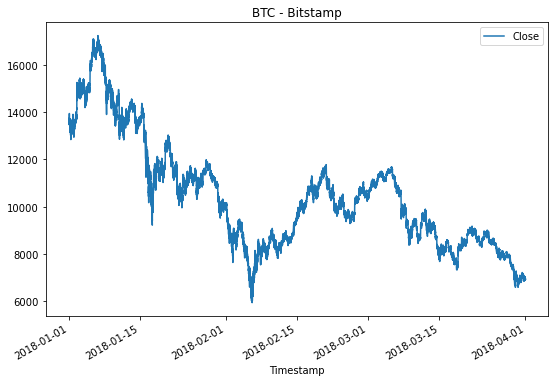

In [36]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(legend=True, figsize=(9, 6), title="BTC - Bitstamp");

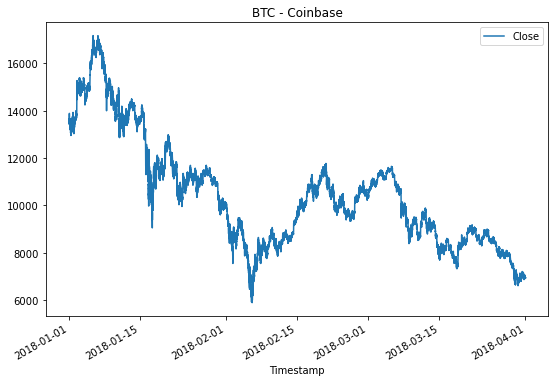

In [35]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend=True, figsize=(9, 6), title='BTC - Coinbase');

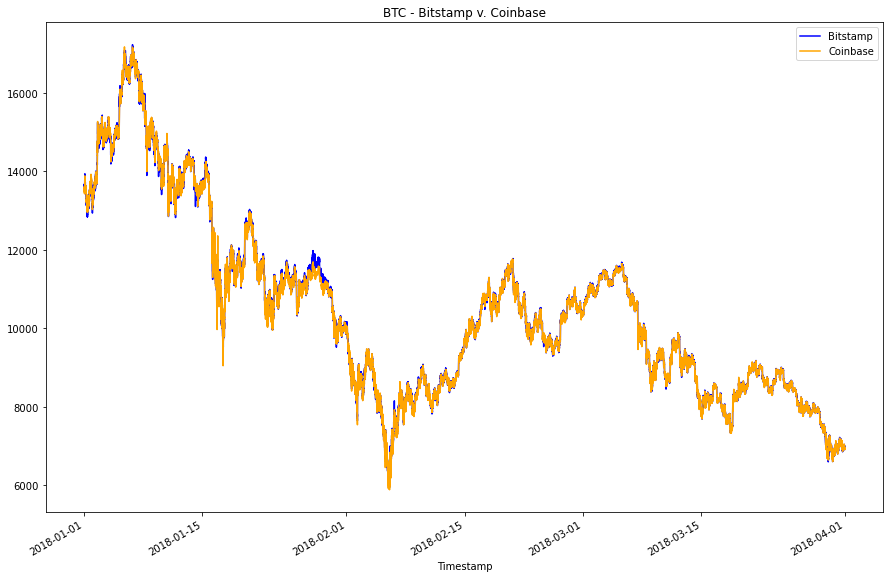

In [37]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 10), title='BTC - Bitstamp v. Coinbase', color='blue', label='Bitstamp')
coinbase_sliced['Close'].plot(legend=True, color='orange', label='Coinbase');

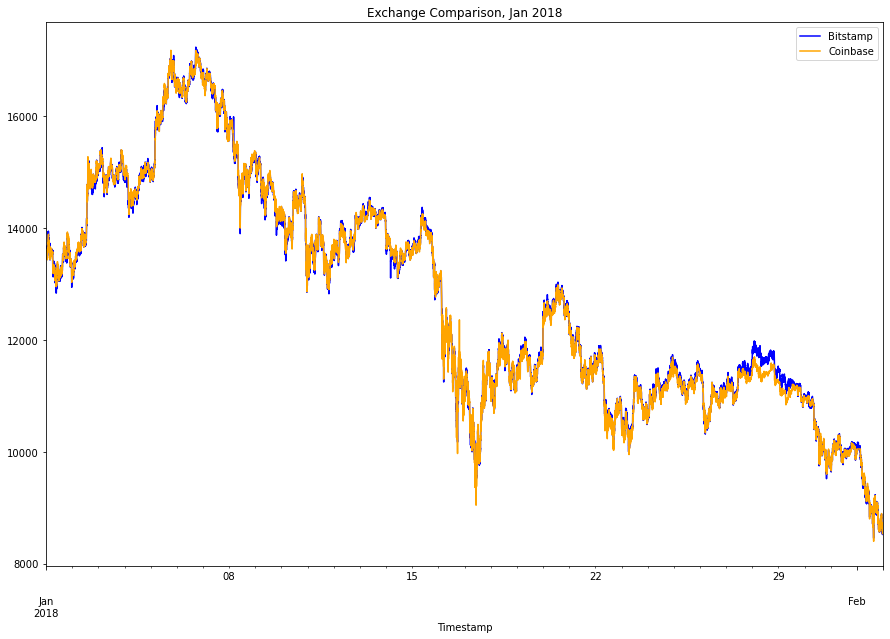

In [42]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
print("")
bitstamp_sliced.loc['2018-01-01': '2018-02-01', 'Close'].plot(
    legend=True, figsize=(15, 10), title='Exchange Comparison, Jan 2018', color='blue', label='Bitstamp'
)
coinbase_sliced.loc['2018-01-01': '2018-02-01', 'Close'].plot(legend=True, color='orange', label='Coinbase');

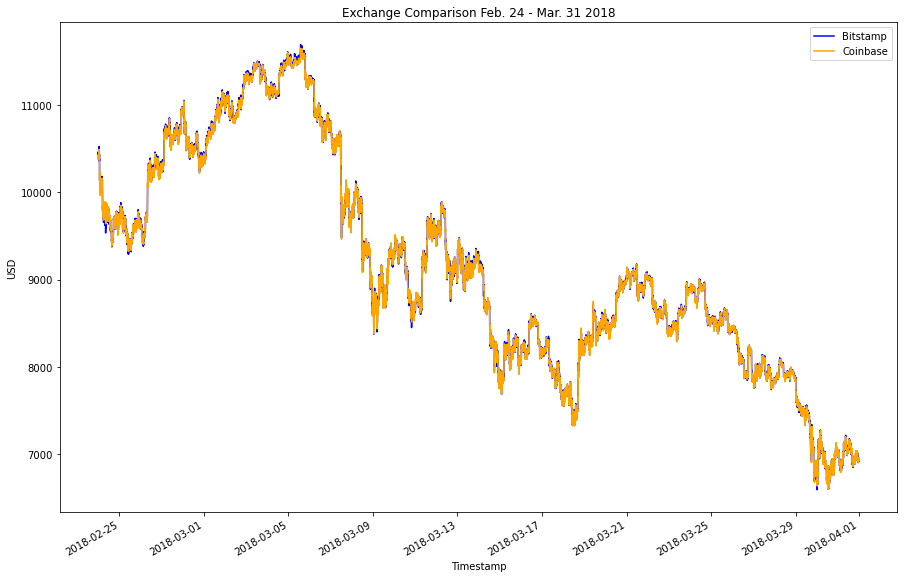

In [44]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
print("")
bitstamp_sliced.loc['2018-02-24': '2018-03-31', 'Close'].plot(
    legend=True, figsize=(15, 10), title='Exchange Comparison Feb. 24 - Mar. 31 2018', color='blue', label='Bitstamp', ylabel='USD'
)
coinbase_sliced.loc['2018-02-24': '2018-03-31', 'Close'].plot(legend=True, color='orange', label='Coinbase');

**Question:** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer:** Based soley on the visulations, there does appear to be a difference in the degree of spread between the two time periods, with the spread being greater in January of 2018 than in March of the same year. If this were an open-ended analysis the next step I would take would be to calculate the mean difference and standard deviatons for each period and perform a t-test to determine if the difference is statistically significant.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

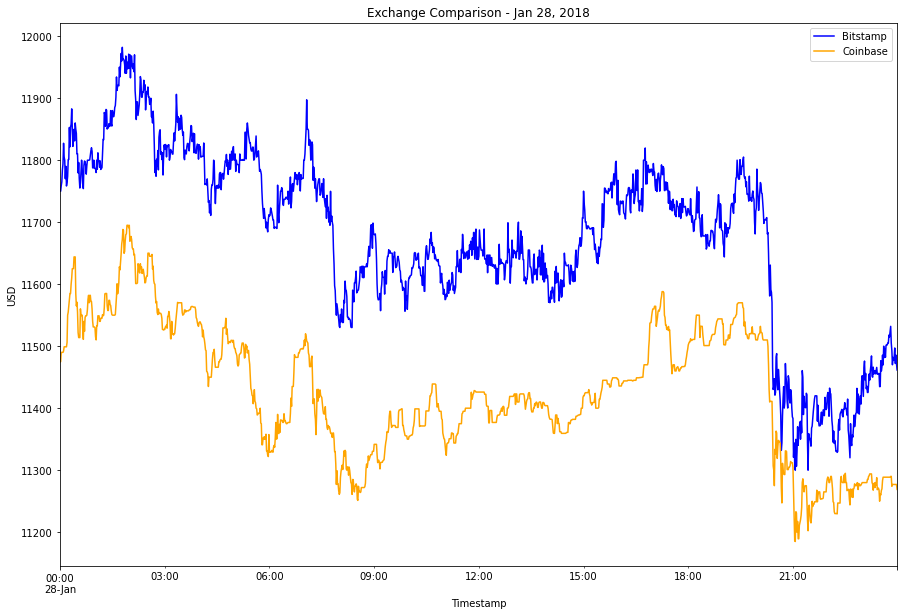

In [46]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
print("")
bitstamp_sliced.loc['2018-01-28', 'Close'].plot(
    legend=True, figsize=(15, 10), title='Exchange Comparison - Jan 28, 2018', ylabel='USD', color='blue', label='Bitstamp'
)
coinbase_sliced.loc['2018-01-28', 'Close'].plot(legend=True, color='orange', label='Coinbase');

In [47]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# Note: In the date that I have selected Bitstamp is the higher closing price,
# so my subtraction calculation is the reverse of what is specified above.

arbitrage_spread_early = bitstamp_sliced.loc['2018-01-28', 'Close'] - coinbase_sliced.loc['2018-01-28', 'Close']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean      247.566187
std        68.288271
min        55.030000
25%       210.412500
50%       251.140000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

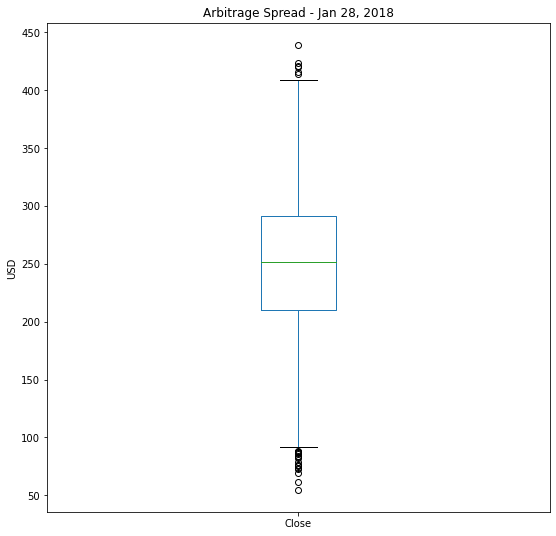

In [50]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(
    kind='box', figsize=(9, 9), title='Arbitrage Spread - Jan 28, 2018', ylabel='USD'
);

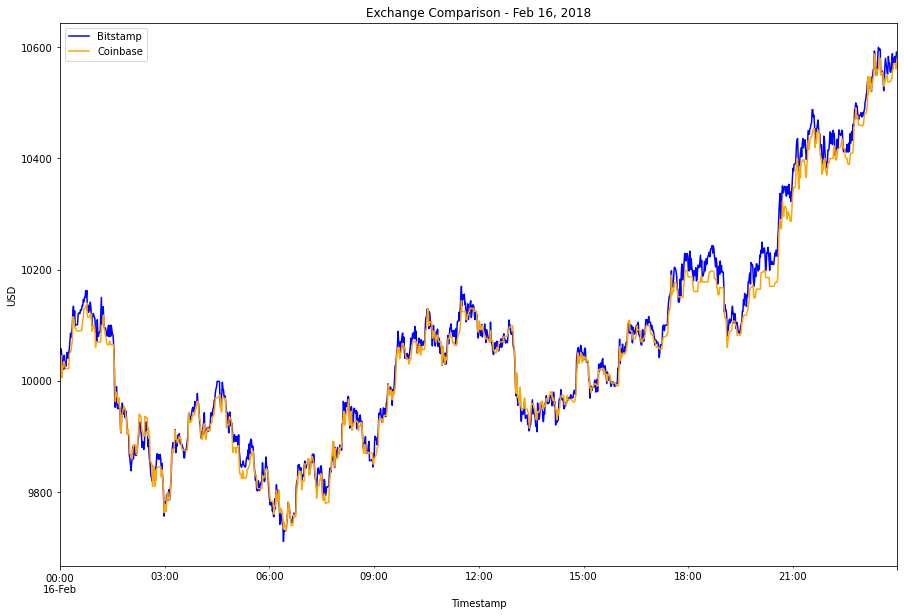

In [51]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
print("")
bitstamp_sliced.loc['2018-02-16', 'Close'].plot(
    legend=True, figsize=(15, 10), title='Exchange Comparison - Feb 16, 2018', ylabel='USD', color='blue', label='Bitstamp'
)
coinbase_sliced.loc['2018-02-16', 'Close'].plot(legend=True, color='orange', label='Coinbase');

In [52]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# Note: In the date that I have selected Bitstamp is the higher closing price,
# so my subtraction calculation is the reverse of what is specified above.

arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-16', 'Close'] - coinbase_sliced.loc['2018-02-16', 'Close']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       10.823646
std        16.937690
min       -56.000000
25%        -1.070000
50%        10.075000
75%        21.457500
max        65.050000
Name: Close, dtype: float64

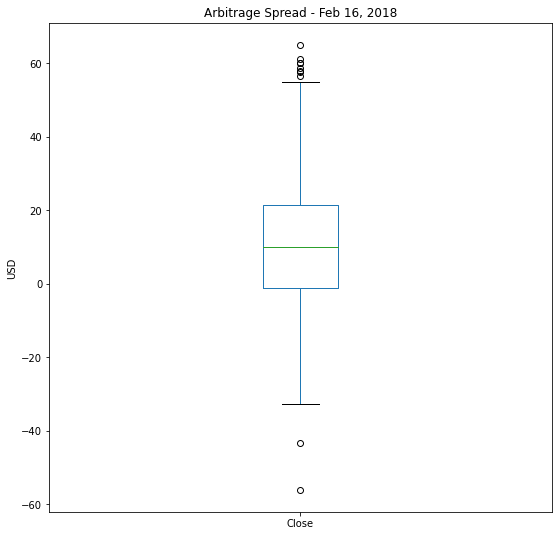

In [53]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(
    kind='box', figsize=(9, 9), title='Arbitrage Spread - Feb 16, 2018', ylabel='USD'
);

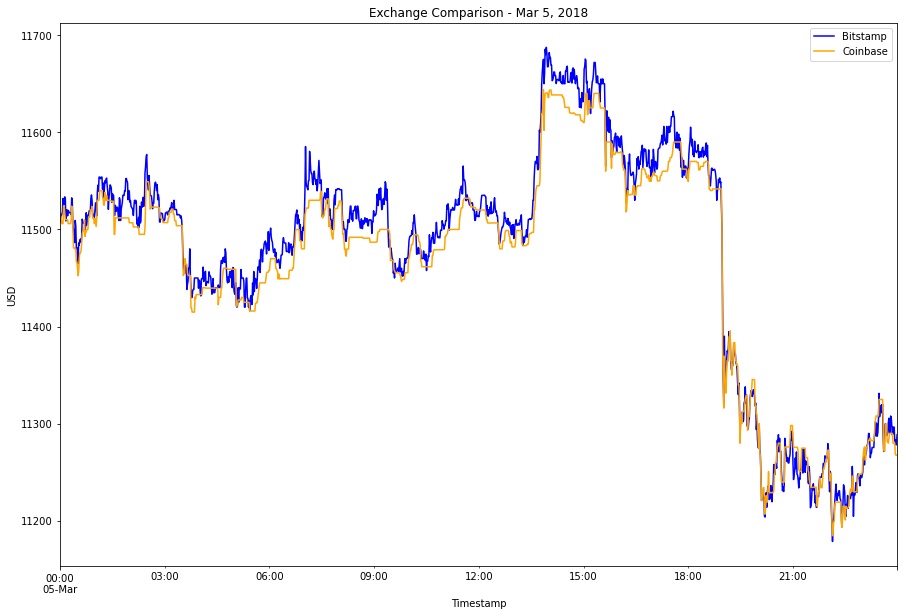

In [54]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
print("")
bitstamp_sliced.loc['2018-03-05', 'Close'].plot(
    legend=True, figsize=(15, 10), title='Exchange Comparison - Mar 5, 2018', ylabel='USD', color='blue', label='Bitstamp'
)
coinbase_sliced.loc['2018-03-05', 'Close'].plot(legend=True, color='orange', label='Coinbase');

In [55]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

# Note: In the date that I have selected Bitstamp is the higher closing price,
# so my subtraction calculation is the reverse of what is specified above.

arbitrage_spread_late = bitstamp_sliced.loc['2018-03-05', 'Close'] - coinbase_sliced.loc['2018-03-05', 'Close']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean       11.812743
std        14.269216
min       -33.180000
25%         2.927500
50%        11.500000
75%        20.482500
max        68.280000
Name: Close, dtype: float64

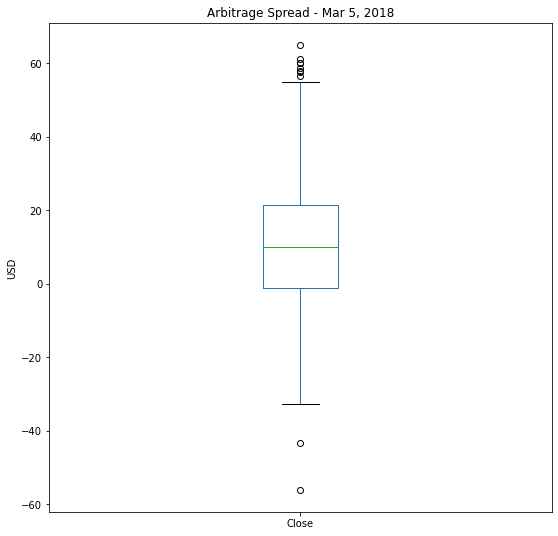

In [56]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_middle.plot(
    kind='box', figsize=(9, 9), title='Arbitrage Spread - Mar 5, 2018', ylabel='USD'
);

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = # YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= # YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [31]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = # YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [32]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [33]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [34]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

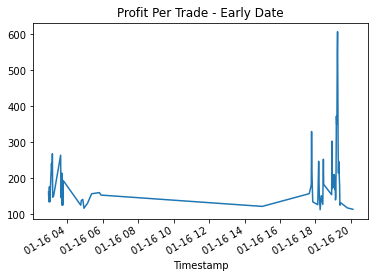

In [35]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [36]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE

14147.169999999998

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [37]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

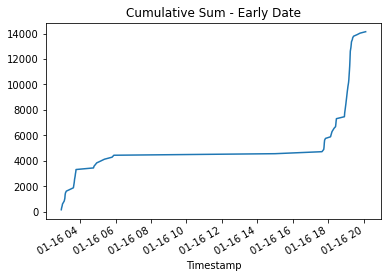

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE